In [35]:
import pandas as pd

# Read parquet file
math_val = pd.read_parquet("../eval_results/Responses_OLD_L1-Qwen-1.5B-Max_val.parquet")
math_val

,data_source,prompt,ability,reward_model,extra_info,responses,token_lengths
0,MATH,[{'content': 'Josh and Mike live 13 miles apar...,math,{'ground_truth': 'Because $\text{(rate)(time)}...,"{'index': 0, 'level': 4.0, 'split': 'val', 'ty...","[)\nOkay, so I have this problem here: Josh an...",[1242]
1,MATH,[{'content': 'Simplify the expression $(9x^2+3...,math,"{'ground_truth': 'Combining like terms, we fin...","{'index': 1, 'level': 3.0, 'split': 'val', 'ty...","[Okay, so I have this expression to simplify: ...",[1288]
2,MATH,[{'content': 'The arithmetic mean (or average)...,math,{'ground_truth': 'We know that $\frac{A+B+C}{3...,"{'index': 2, 'level': 3.0, 'split': 'val', 'ty...","[Okay, so I have this problem here about the a...",[1159]
3,MATH,[{'content': 'Eleven pencils cost as much as t...,math,{'ground_truth': 'If seven pens costs $\$9.24$...,"{'index': 3, 'level': 2.0, 'split': 'val', 'ty...","[ Good luck.\nOkay, so I have this problem her...",[969]
4,MATH,"[{'content': 'Assuming $x\ne0$, simplify $\fra...",math,{'ground_truth': 'We have \begin{align*} \fra...,"{'index': 4, 'level': 2.0, 'split': 'val', 'ty...","[Okay, so I have this problem here: I need to ...",[1018]
...,...,...,...,...,...,...,...
4495,MATH,[{'content': 'Below is the graph of an ellipse...,math,{'ground_truth': 'We see that the endpoints of...,"{'index': 4495, 'level': 3.0, 'split': 'val', ...","[]\nOkay, so I have this problem about an elli...",[1476]
4496,MATH,[{'content': 'Find the center of the ellipse w...,math,{'ground_truth': 'Completing the square in $x$...,"{'index': 4496, 'level': 1.0, 'split': 'val', ...",[ To find the center of the ellipse given by t...,[1064]
4497,MATH,[{'content': 'Let a sequence be defined as fol...,math,{'ground_truth': 'The fact that the equation $...,"{'index': 4497, 'level': 5.0, 'split': 'val', ...","[[/]\nOkay, so I have this problem here about ...",[2094]
4498,MATH,[{'content': 'What is the area of the region i...,math,{'ground_truth': 'Because $\lfloor x \rfloor$ ...,"{'index': 4498, 'level': 4.0, 'split': 'val', ...","[[/]\nOkay, so I need to find the area of the ...",[1565]


In [36]:
from utils import last_boxed_only_string, remove_boxed
import numpy as np

def extract_answer(solution_str: str) -> str:
    """Extract the final boxed answer from a solution string."""
    return remove_boxed(last_boxed_only_string(solution_str))

math_val["level"] = math_val["extra_info"].apply(lambda d: d.get("level") if isinstance(d, dict) else None)
math_val["type"] = math_val["extra_info"].apply(lambda d: d.get("type") if isinstance(d, dict) else None)
math_val["ground_truth"] = math_val["reward_model"].apply(lambda d: extract_answer(d["ground_truth"]))
math_val["responses"] = math_val["responses"].apply(lambda x: x[0] if isinstance(x, np.ndarray) and len(x) == 1 else x)
math_val["answer"] = math_val["responses"].apply(lambda r: extract_answer(r) if r else None)
math_val["token_lengths"] = math_val["token_lengths"].apply(lambda x: x[0] if isinstance(x, np.ndarray) and len(x) == 1 else x)

math_val

,data_source,prompt,ability,reward_model,extra_info,responses,token_lengths,level,type,ground_truth,answer
0,MATH,[{'content': 'Josh and Mike live 13 miles apar...,math,{'ground_truth': 'Because $\text{(rate)(time)}...,"{'index': 0, 'level': 4.0, 'split': 'val', 'ty...",")\nOkay, so I have this problem here: Josh and...",1242,4.0,Algebra,5,5
1,MATH,[{'content': 'Simplify the expression $(9x^2+3...,math,"{'ground_truth': 'Combining like terms, we fin...","{'index': 1, 'level': 3.0, 'split': 'val', 'ty...","Okay, so I have this expression to simplify: (...",1288,3.0,Algebra,7x^5+12x^2+3x+9,7x^5 + 12x^2 + 3x + 9
2,MATH,[{'content': 'The arithmetic mean (or average)...,math,{'ground_truth': 'We know that $\frac{A+B+C}{3...,"{'index': 2, 'level': 3.0, 'split': 'val', 'ty...","Okay, so I have this problem here about the ar...",1159,3.0,Algebra,14,14
3,MATH,[{'content': 'Eleven pencils cost as much as t...,math,{'ground_truth': 'If seven pens costs $\$9.24$...,"{'index': 3, 'level': 2.0, 'split': 'val', 'ty...","Good luck.\nOkay, so I have this problem here...",969,2.0,Algebra,36,36
4,MATH,"[{'content': 'Assuming $x\ne0$, simplify $\fra...",math,{'ground_truth': 'We have \begin{align*} \fra...,"{'index': 4, 'level': 2.0, 'split': 'val', 'ty...","Okay, so I have this problem here: I need to s...",1018,2.0,Algebra,10,10
...,...,...,...,...,...,...,...,...,...,...,...
4495,MATH,[{'content': 'Below is the graph of an ellipse...,math,{'ground_truth': 'We see that the endpoints of...,"{'index': 4495, 'level': 3.0, 'split': 'val', ...","]\nOkay, so I have this problem about an ellip...",1476,3.0,Intermediate Algebra,-4,-\dfrac{4}{3}
4496,MATH,[{'content': 'Find the center of the ellipse w...,math,{'ground_truth': 'Completing the square in $x$...,"{'index': 4496, 'level': 1.0, 'split': 'val', ...",To find the center of the ellipse given by th...,1064,1.0,Intermediate Algebra,"(2,1)","(2, 1)"
4497,MATH,[{'content': 'Let a sequence be defined as fol...,math,{'ground_truth': 'The fact that the equation $...,"{'index': 4497, 'level': 5.0, 'split': 'val', ...","[/]\nOkay, so I have this problem here about a...",2094,5.0,Intermediate Algebra,224,2007
4498,MATH,[{'content': 'What is the area of the region i...,math,{'ground_truth': 'Because $\lfloor x \rfloor$ ...,"{'index': 4498, 'level': 4.0, 'split': 'val', ...","[/]\nOkay, so I need to find the area of the r...",1565,4.0,Intermediate Algebra,10,10


In [43]:
import sys
import os

# Add the project root (one level up from explore/)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

import importlib
import scripts.math_reward

importlib.reload(scripts.math_reward)

from scripts.math_reward import math_reward_fn

target_tokens = 3600

math_val["reward"] = math_val.apply(
    lambda row: math_reward_fn(row["responses"], row["ground_truth"], target_tokens, row["token_lengths"]), 
    axis=1
)

math_val["is_correct"] = math_val["reward"] > 0

math_val

,data_source,prompt,ability,reward_model,extra_info,responses,token_lengths,level,type,ground_truth,answer,reward,is_correct
0,MATH,[{'content': 'Josh and Mike live 13 miles apar...,math,{'ground_truth': 'Because $\text{(rate)(time)}...,"{'index': 0, 'level': 4.0, 'split': 'val', 'ty...",")\nOkay, so I have this problem here: Josh and...",1242,4.0,Algebra,5,5,0.980356,True
1,MATH,[{'content': 'Simplify the expression $(9x^2+3...,math,"{'ground_truth': 'Combining like terms, we fin...","{'index': 1, 'level': 3.0, 'split': 'val', 'ty...","Okay, so I have this expression to simplify: (...",1288,3.0,Algebra,7x^5+12x^2+3x+9,7x^5 + 12x^2 + 3x + 9,0.978791,True
2,MATH,[{'content': 'The arithmetic mean (or average)...,math,{'ground_truth': 'We know that $\frac{A+B+C}{3...,"{'index': 2, 'level': 3.0, 'split': 'val', 'ty...","Okay, so I have this problem here about the ar...",1159,3.0,Algebra,14,14,0.982894,True
3,MATH,[{'content': 'Eleven pencils cost as much as t...,math,{'ground_truth': 'If seven pens costs $\$9.24$...,"{'index': 3, 'level': 2.0, 'split': 'val', 'ty...","Good luck.\nOkay, so I have this problem here...",969,2.0,Algebra,36,36,0.987537,True
4,MATH,"[{'content': 'Assuming $x\ne0$, simplify $\fra...",math,{'ground_truth': 'We have \begin{align*} \fra...,"{'index': 4, 'level': 2.0, 'split': 'val', 'ty...","Okay, so I have this problem here: I need to s...",1018,2.0,Algebra,10,10,0.986477,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,MATH,[{'content': 'Below is the graph of an ellipse...,math,{'ground_truth': 'We see that the endpoints of...,"{'index': 4495, 'level': 3.0, 'split': 'val', ...","]\nOkay, so I have this problem about an ellip...",1476,3.0,Intermediate Algebra,-4,-\dfrac{4}{3},-1.000000,False
4496,MATH,[{'content': 'Find the center of the ellipse w...,math,{'ground_truth': 'Completing the square in $x$...,"{'index': 4496, 'level': 1.0, 'split': 'val', ...",To find the center of the ellipse given by th...,1064,1.0,Intermediate Algebra,"(2,1)","(2, 1)",0.985399,True
4497,MATH,[{'content': 'Let a sequence be defined as fol...,math,{'ground_truth': 'The fact that the equation $...,"{'index': 4497, 'level': 5.0, 'split': 'val', ...","[/]\nOkay, so I have this problem here about a...",2094,5.0,Intermediate Algebra,224,2007,-1.000000,False
4498,MATH,[{'content': 'What is the area of the region i...,math,{'ground_truth': 'Because $\lfloor x \rfloor$ ...,"{'index': 4498, 'level': 4.0, 'split': 'val', ...","[/]\nOkay, so I need to find the area of the r...",1565,4.0,Intermediate Algebra,10,10,0.966347,True


In [89]:
math_val[math_val['is_correct'] == True]["token_lengths"].value_counts().sort_index(ascending=False)


token_lengths
3364    1
3258    1
3254    1
3079    1
3027    1
       ..
339     1
319     1
314     1
301     1
279     1
Name: count, Length: 1293, dtype: int64

In [93]:
cdf = math_val[math_val['is_correct']==True]["token_lengths"].value_counts(normalize=True).sort_index().cumsum()
cdf

# 96% of correct answers are within 2000 tokens
# 92% of all answers are within 2000 tokens

token_lengths
279     0.000260
301     0.000520
314     0.000781
319     0.001041
339     0.001301
          ...   
3027    0.998959
3079    0.999219
3254    0.999480
3258    0.999740
3364    1.000000
Name: proportion, Length: 1293, dtype: float64

## Average Token Length Per Type and Level

We also look into the average length considering correct and incorrect answers only

In [60]:
grouped_all = math_val.groupby(['type', 'level'])['token_lengths'].agg(['mean', 'std']).reset_index()

grouped_all

,type,level,mean,std
0,Algebra,1.0,1186.500000,318.910049
1,Algebra,2.0,1212.505556,287.981911
2,Algebra,3.0,1240.289362,259.391236
3,Algebra,4.0,1280.889328,305.737002
4,Algebra,5.0,1373.469314,347.006500
5,Counting & Probability,1.0,1223.837838,303.561591
6,Counting & Probability,2.0,1219.946809,264.014066
7,Counting & Probability,3.0,1324.177083,292.059078
8,Counting & Probability,4.0,1420.785714,321.694363
9,Counting & Probability,5.0,1601.684685,704.634205


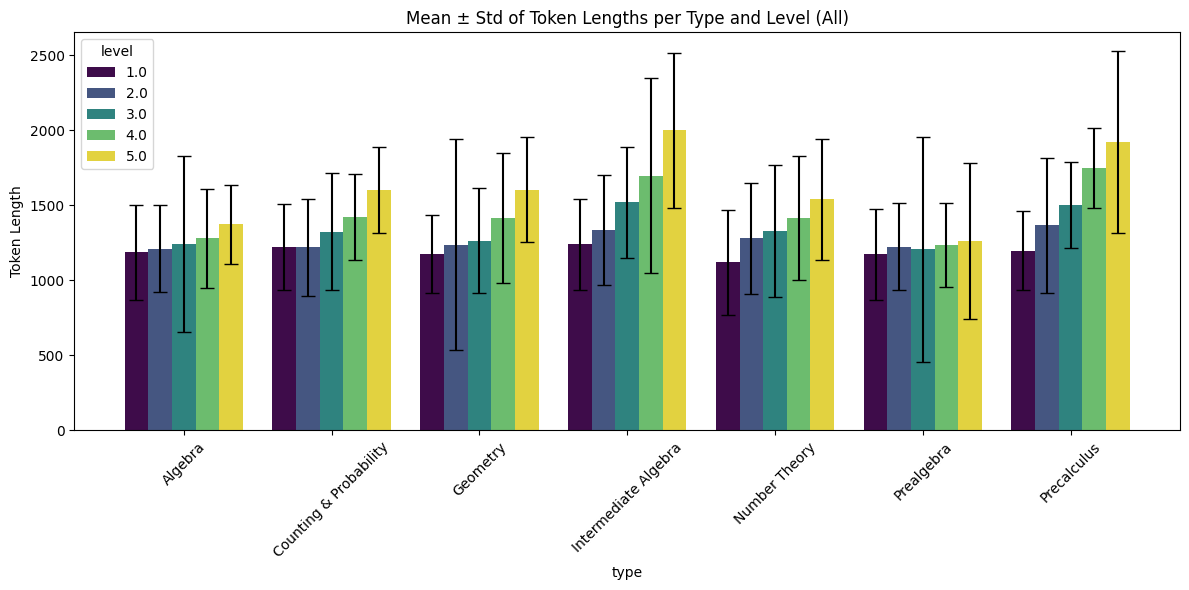

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by type and level, calculate mean and std
grouped_all = math_val.groupby(['type', 'level'])['token_lengths'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grouped_all, x='type', y='mean', hue='level', palette='viridis')

# Add error bars: match each row in grouped_all to a bar
for (i, row), bar in zip(grouped_all.iterrows(), ax.patches):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.errorbar(x=x, y=height, yerr=row['std'], fmt='none', c='black', capsize=5)


plt.title('Mean ± Std of Token Lengths per Type and Level (All)')
plt.ylabel('Token Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

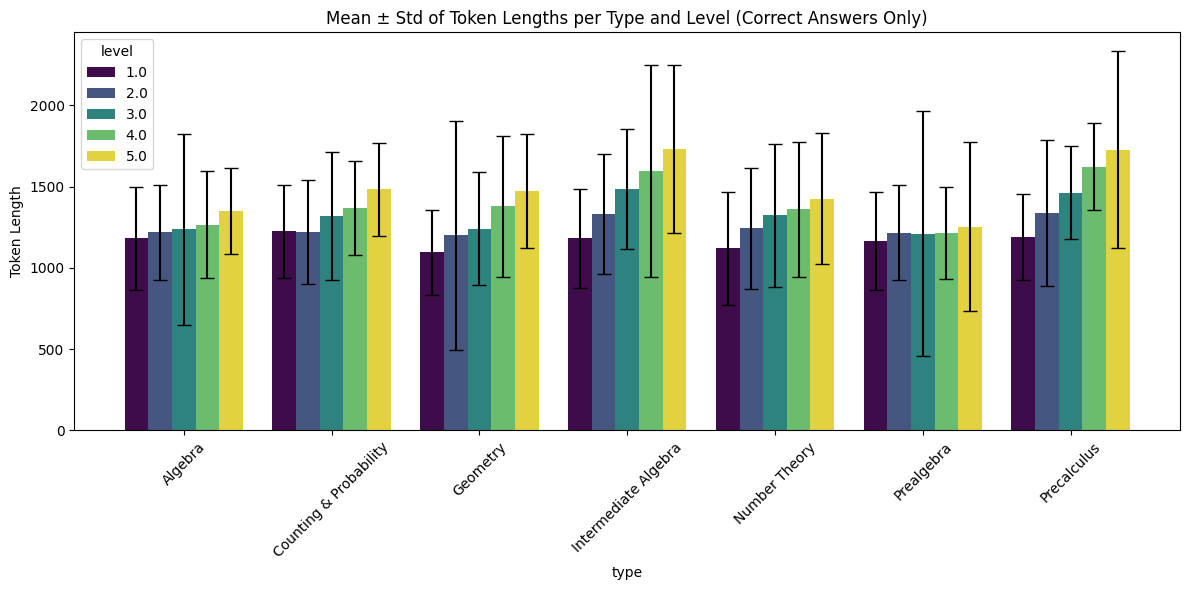

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CORRECT ANSWERS ONLY
correct = math_val[math_val['is_correct'] == True]
grouped_correct = correct.groupby(['type', 'level'])['token_lengths'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grouped_correct, x='type', y='mean', hue='level', palette='viridis')

# Add error bars: match each row in grouped_all to a bar
for (i, row), bar in zip(grouped_all.iterrows(), ax.patches):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.errorbar(x=x, y=height, yerr=row['std'], fmt='none', c='black', capsize=5)


plt.title('Mean ± Std of Token Lengths per Type and Level (Correct Answers Only)')
plt.ylabel('Token Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

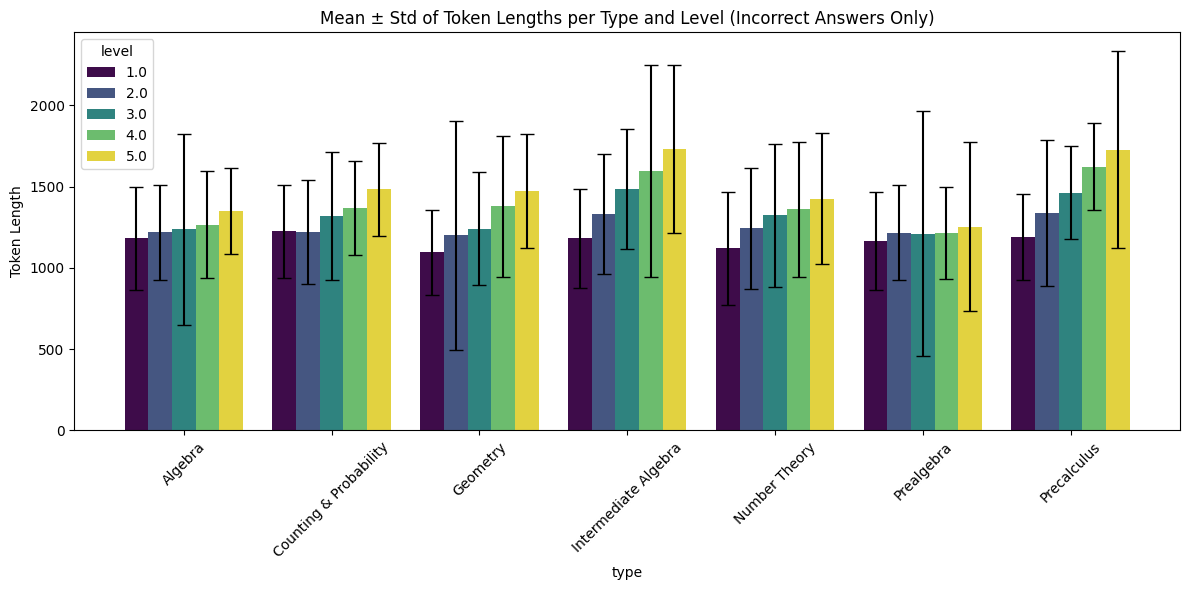

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CORRECT ANSWERS ONLY
incorrect = math_val[math_val['is_correct'] == False]
grouped_incorrect = incorrect.groupby(['type', 'level'])['token_lengths'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grouped_correct, x='type', y='mean', hue='level', palette='viridis')

# Add error bars: match each row in grouped_all to a bar
for (i, row), bar in zip(grouped_all.iterrows(), ax.patches):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.errorbar(x=x, y=height, yerr=row['std'], fmt='none', c='black', capsize=5)


plt.title('Mean ± Std of Token Lengths per Type and Level (Incorrect Answers Only)')
plt.ylabel('Token Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [70]:
# TABLE SUMMARY
grouped_all['group'] = 'all'
grouped_correct['group'] = 'correct'
grouped_incorrect['group'] = 'incorrect'

token_length_summary = pd.concat([grouped_all, grouped_correct, grouped_incorrect], ignore_index=True)
token_length_summary = token_length_summary.sort_values(by=['type', 'level']).reset_index(drop=True)

token_length_summary

,type,level,mean,std,group
0,Algebra,1.0,1186.500000,318.910049,all
1,Algebra,1.0,1181.508772,321.426226,correct
2,Algebra,1.0,1328.750000,216.770808,incorrect
3,Algebra,2.0,1212.505556,287.981911,all
4,Algebra,2.0,1220.301136,281.374494,correct
...,...,...,...,...,...
99,Precalculus,4.0,1623.128571,400.748753,correct
100,Precalculus,4.0,2038.548387,638.360444,incorrect
101,Precalculus,5.0,1921.528455,605.536618,all
102,Precalculus,5.0,1726.913043,418.627229,correct


## Average Token Length Per Level ONLY

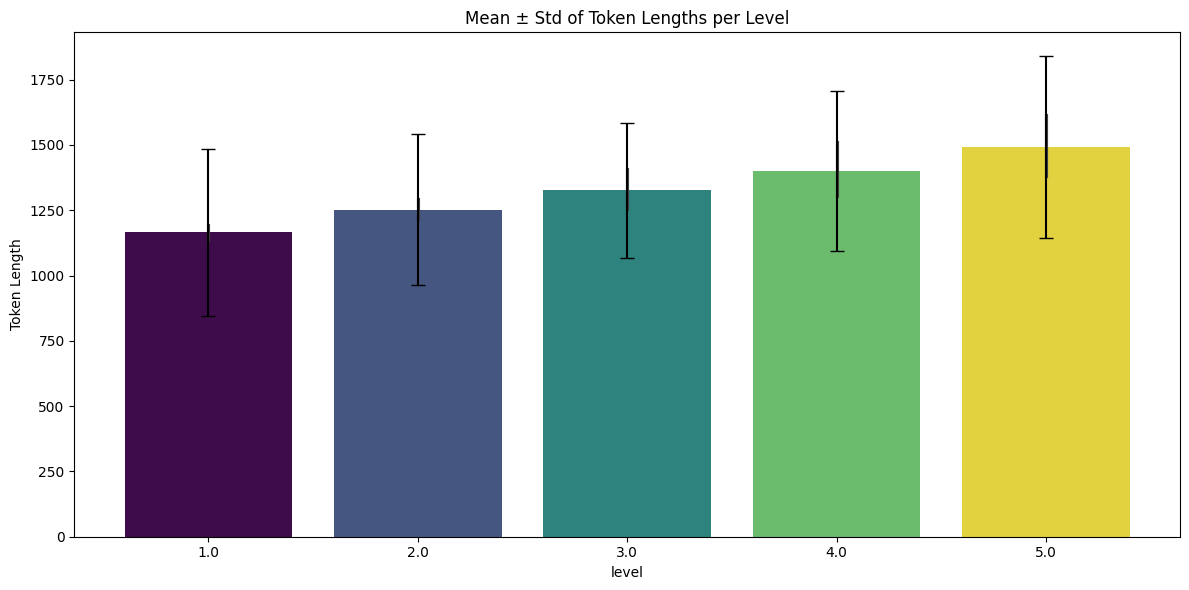

In [77]:
grouped_lvl_all = math_val.groupby('level')['token_lengths'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grouped_correct, x='level', y='mean', hue='level', palette='viridis', legend=False)

# Add error bars: match each row in grouped_all to a bar
for (i, row), bar in zip(grouped_all.iterrows(), ax.patches):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.errorbar(x=x, y=height, yerr=row['std'], fmt='none', c='black', capsize=5)


plt.title('Mean ± Std of Token Lengths per Level')
plt.ylabel('Token Length')
plt.tight_layout()
plt.show()

## Average Token Length Per Type ONLY

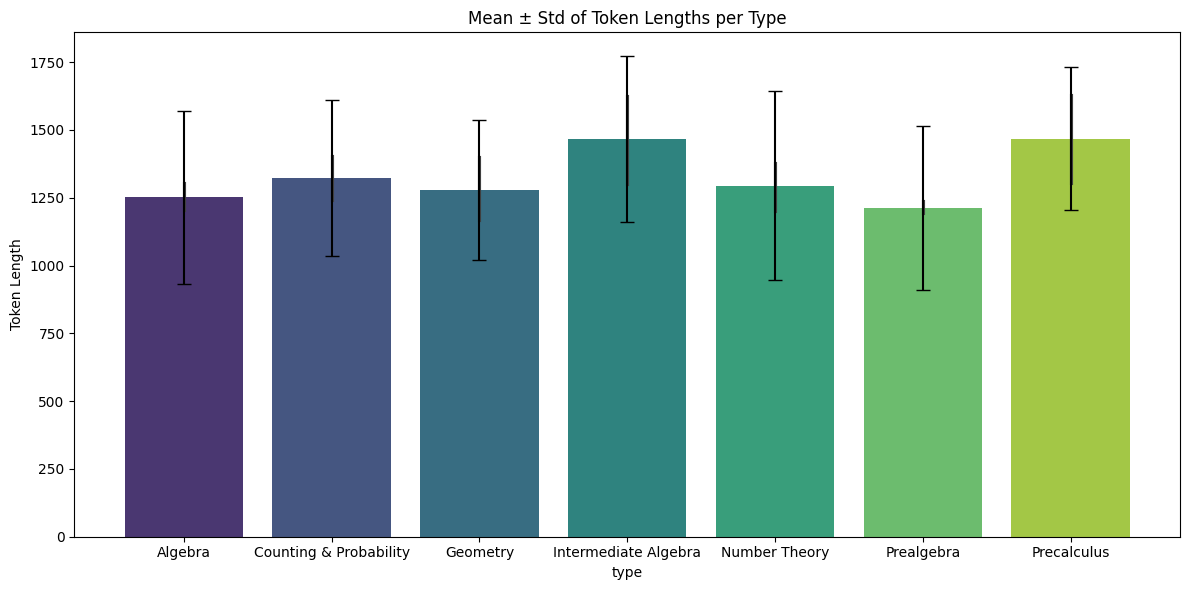

In [78]:
grouped_type_all = math_val.groupby('type')['token_lengths'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grouped_correct, x='type', y='mean', hue='type', palette='viridis', legend=False)

# Add error bars: match each row in grouped_all to a bar
for (i, row), bar in zip(grouped_all.iterrows(), ax.patches):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.errorbar(x=x, y=height, yerr=row['std'], fmt='none', c='black', capsize=5)


plt.title('Mean ± Std of Token Lengths per Type')
plt.ylabel('Token Length')
plt.tight_layout()
plt.show()

## DRAFT (Finish incomplete eval runs)

In [98]:
import os
import csv
import pandas as pd
from tabulate import tabulate
from tqdm import tqdm

output_dir = "../eval_results"
n_samples = 1
model_path = "models/L1-Max-Qwen-1.5B-Adaptive"
data_path = "MATH_processed/no_level_type/test.parquet"
max_new_tokens = 2000
batch_size = 32


def evaluate_responses(responses, ground_truths, target_tokens, token_lengths):
    total_scores = []
    total_rewards = []
    passes = 0
    for resp_list, gt, target, used in tqdm(zip(responses, ground_truths, target_tokens, token_lengths), total=len(responses), desc="Evaluating"):
        rewards_list = [math_reward_fn(r, gt, target, u) for r, u in zip(list(resp_list), list(token_lengths))]
        total_rewards.append(rewards_list)
        score_list = [0 if reward == -1 else 1 for reward in rewards_list]
        total_scores.append(score_list)
        if np.max(score_list) == 1:
            passes += 1
    pass_at_1 = np.mean([s[0] for s in total_scores])
    pass_at_n = passes / len(responses)
    return pass_at_1, pass_at_n, total_scores, total_rewards


df = pd.read_parquet("../eval_results/Responses_L1-Max-Qwen-1.5B-Adaptive_test_no_level_type.parquet")

ground_truths = [rm["ground_truth"] for rm in df["reward_model"]]
target_tokens = [rm["num_tokens"] for rm in df["reward_model"]]
responses = df["responses"]
token_lengths = df["token_lengths"]

# Evaluate
pass_at_1, pass_at_n, total_scores, total_rewards = evaluate_responses(responses, ground_truths, target_tokens, token_lengths)
print(f"pass@1: {pass_at_1:.4f}, pass@{n_samples}: {pass_at_n:.4f}")

# Save metrics
csv_path = os.path.join(output_dir, "pass.csv")
row_data = {
    "model_path": model_path,
    "dataset": os.path.basename(data_path),
    "pass@1": pass_at_1,
    f"pass@{n_samples}": pass_at_n
}
file_exists = os.path.isfile(csv_path)
with open(csv_path, mode='a', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=row_data.keys())
    if not file_exists:
        writer.writeheader()
    writer.writerow(row_data)

# Save total_scores
total_scores_df = pd.DataFrame(total_scores)
total_rewards_df = pd.DataFrame(total_rewards)

# Extract model name and split name from paths
model_name = os.path.basename(model_path.rstrip("/"))
split_name = os.path.splitext(os.path.basename(data_path))[0]

total_scores_filename = f"TotalScores_{model_name}_{split_name}.parquet"
total_scores_df.to_parquet(os.path.join(output_dir, total_scores_filename))

total_rewards_filename = f"TotalRewards_{model_name}_{split_name}.parquet"
total_rewards_df.to_parquet(os.path.join(output_dir, total_rewards_filename))

# Print summary
table_data = [[k, v] for k, v in row_data.items()]
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

Evaluating:   0%|          | 0/500 [00:00<?, ?it/s]

Evaluating: 100%|██████████| 500/500 [00:00<00:00, 2182.96it/s]

pass@1: 0.7820, pass@1: 0.7820
+------------+----------------------------------+
| Metric     | Value                            |
+============+==================================+
| model_path | models/L1-Max-Qwen-1.5B-Adaptive |
+------------+----------------------------------+
| dataset    | test.parquet                     |
+------------+----------------------------------+
| pass@1     | 0.782                            |
+------------+----------------------------------+
